In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from pathlib import Path
import os
from pylab import MaxNLocator
import yfinance as yf
import requests
import alpaca_trade_api as tradeapi
import numpy as np
import csv
import hvplot.pandas
import datetime as dt

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
amzn = yf.Ticker("AMZN")
cost = yf.Ticker("COST")
tgt = yf.Ticker("TGT")
wmt = yf.Ticker("WMT")
spy = yf.Ticker("SPY")

In [5]:
## 2018 - 2020 Returns

timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["AMZN","COST","TGT", "WMT", "SPY"]


three_year_returns = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
three_year_returns.head()

AMZN                                      \
                              open     high      low    close   volume   
time                                                                     
2018-01-02 00:00:00-05:00  1172.00  1190.00  1170.51  1189.00  1615329   
2018-01-03 00:00:00-05:00  1188.30  1205.49  1188.30  1202.74  1979510   
2018-01-04 00:00:00-05:00  1207.52  1215.87  1204.66  1209.64  1918318   
2018-01-05 00:00:00-05:00  1217.51  1229.14  1210.00  1229.07  2134446   
2018-01-08 00:00:00-05:00  1236.00  1253.08  1232.03  1246.95  2621390   

                             COST                                     ...  \
                             open     high      low   close   volume  ...   
time                                                                  ...   
2018-01-02 00:00:00-05:00  187.19  190.680  186.750  188.36  1746783  ...   
2018-01-03 00:00:00-05:00  188.52  192.100  188.380  190.61  2258752  ...   
2018-01-04 00:00:00-05:00  192.00  192.300  187.561  189.12  2566125  ...   
2018-01-05 00:00:00-05:00  189.43  189.680  186.720  187.75  2000923  ...   
2018-01-08 00:00:00-05:00  187.32  188.979  187.250  188.47  1126558  ...   

                             TGT                                      WMT  \
                            open   high     low  close     volume    open   
time                                                                        
2018-01-02 00:00:00-05:00  65.95  68.13  65.250  67.66  6727945.0   99.30   
2018-01-03 00:00:00-05:00  68.69  68.84  67.100  67.17  5124134.0   98.85   
2018-01-04 00:00:00-05:00  67.23  67.82  65.060  65.85  6117706.0   99.54   
2018-01-05 00:00:00-05:00  66.38  66.74  65.950  66.54  4185121.0   99.64   
2018-01-08 00:00:00-05:00  67.20  68.32  66.245  67.17  6330768.0  100.25   

                                                                
                             high      low    close     volume  
time                                                            
2018-01-02 00:00:00-05:00   99.79   98.520   98.560  8501212.0  
2018-01-03 00:00:00-05:00  100.00   98.770   99.440  7105903.0  
2018-01-04 00:00:00-05:00   99.78   98.911   99.535  5038573.0  
2018-01-05 00:00:00-05:00  100.38   99.610  100.120  5596520.0  
2018-01-08 00:00:00-05:00  101.75  100.210  101.570  6263264.0  

[5 rows x 25 columns]

In [6]:
# Create and empty DataFrame for closing prices
threeyear_daily_close = pd.DataFrame()

In [7]:
threeyear_daily_close["AMZN"] = three_year_returns["AMZN"]["close"]
threeyear_daily_close["COST"] = three_year_returns["COST"]["close"]
threeyear_daily_close["TGT"] = three_year_returns["TGT"]["close"]
threeyear_daily_close["WMT"] = three_year_returns["WMT"]["close"]
threeyear_daily_close["SPY"] = three_year_returns["SPY"]["close"]

In [8]:
# Drop the time component of the date
threeyear_daily_close.index = threeyear_daily_close.index.date

In [9]:
threeyear_dailyreturns = threeyear_daily_close.pct_change().dropna()

In [10]:
cum_returns = (1 + threeyear_dailyreturns).cumprod() - 1

In [11]:
cum_returns.tail()

,AMZN,COST,TGT,WMT,SPY
2020-12-24,1.667082,0.935496,1.590452,0.455966,0.372730
2020-12-28,1.761951,0.970164,1.606414,0.473417,0.384449
2020-12-29,1.792860,0.979401,1.587053,0.464184,0.381994
2020-12-30,1.763541,0.988161,1.570500,0.463474,0.383668
2020-12-31,1.738780,1.000319,1.605823,0.461952,0.390811


<AxesSubplot:>

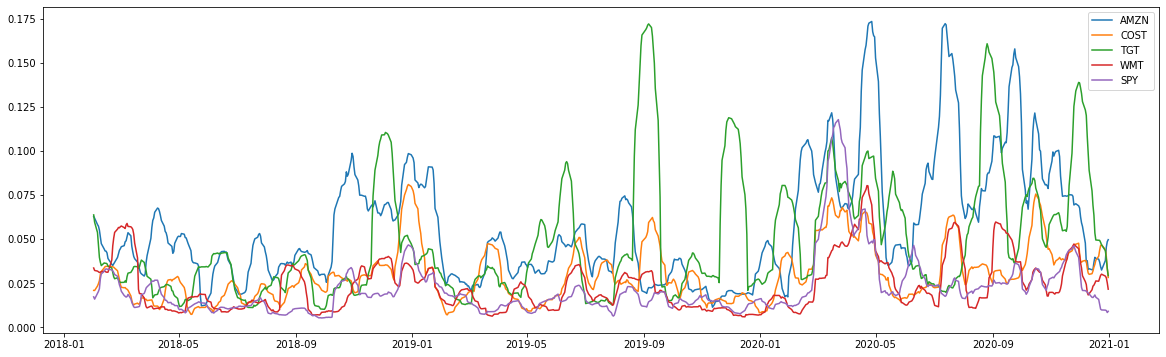

In [12]:
cum_returns = cum_returns.rolling(window=21).std()
cum_returns.plot(figsize=(20,6))

In [13]:
amzn_cum_3year = 1.738780
cost_cum_3year = 1.000319
tgt_cum_3year = 1.605823
wmt_cum_3year = 0.461952

In [14]:
#Data

timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2018-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["AMZN","COST", "TGT", "WMT", "SPY"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2018_retail = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2018_retail.head()

AMZN                                      \
                              open     high      low    close   volume   
time                                                                     
2018-01-02 00:00:00-05:00  1172.00  1190.00  1170.51  1189.00  1615329   
2018-01-03 00:00:00-05:00  1188.30  1205.49  1188.30  1202.74  1979510   
2018-01-04 00:00:00-05:00  1207.52  1215.87  1204.66  1209.64  1918318   
2018-01-05 00:00:00-05:00  1217.51  1229.14  1210.00  1229.07  2134446   
2018-01-08 00:00:00-05:00  1236.00  1253.08  1232.03  1246.95  2621390   

                             COST                                     ...  \
                             open     high      low   close   volume  ...   
time                                                                  ...   
2018-01-02 00:00:00-05:00  187.19  190.680  186.750  188.36  1746783  ...   
2018-01-03 00:00:00-05:00  188.52  192.100  188.380  190.61  2258752  ...   
2018-01-04 00:00:00-05:00  192.00  192.300  187.561  189.12  2566125  ...   
2018-01-05 00:00:00-05:00  189.43  189.680  186.720  187.75  2000923  ...   
2018-01-08 00:00:00-05:00  187.32  188.979  187.250  188.47  1126558  ...   

                             TGT                                    WMT  \
                            open   high     low  close   volume    open   
time                                                                      
2018-01-02 00:00:00-05:00  65.95  68.13  65.250  67.66  6727945   99.30   
2018-01-03 00:00:00-05:00  68.69  68.84  67.100  67.17  5124134   98.85   
2018-01-04 00:00:00-05:00  67.23  67.82  65.060  65.85  6117706   99.54   
2018-01-05 00:00:00-05:00  66.38  66.74  65.950  66.54  4185121   99.64   
2018-01-08 00:00:00-05:00  67.20  68.32  66.245  67.17  6330768  100.25   

                                                              
                             high      low    close   volume  
time                                                          
2018-01-02 00:00:00-05:00   99.79   98.520   98.560  8501212  
2018-01-03 00:00:00-05:00  100.00   98.770   99.440  7105903  
2018-01-04 00:00:00-05:00   99.78   98.911   99.535  5038573  
2018-01-05 00:00:00-05:00  100.38   99.610  100.120  5596520  
2018-01-08 00:00:00-05:00  101.75  100.210  101.570  6263264  

[5 rows x 25 columns]

In [15]:
# Create and empty DataFrame for closing prices
df2018_closing_retail = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2018_closing_retail["AMZN"] = df2018_retail["AMZN"]["close"]
df2018_closing_retail["COST"] = df2018_retail["COST"]["close"]
df2018_closing_retail["TGT"] = df2018_retail["TGT"]["close"]
df2018_closing_retail["WMT"] = df2018_retail["WMT"]["close"]
df2018_closing_retail["SPY"] = df2018_retail["SPY"]["close"]

# Drop the time component of the date
df2018_closing_retail.index = df2018_closing_retail.index.date

# Compute daily returns
df2018_daily_returns_retail = df2018_closing_retail.pct_change().dropna()

# Display sample data
df2018_daily_returns_retail.tail(10)

,AMZN,COST,TGT,WMT,SPY
2018-12-17,-0.045335,-0.023617,-0.042870,-0.012084,-0.020729
2018-12-18,0.020635,0.003809,0.016952,0.003526,0.000078
2018-12-19,-0.036284,-0.007392,-0.039609,-0.005380,-0.015405
2018-12-20,-0.022745,-0.020851,-0.017197,-0.036653,-0.015685
2018-12-21,-0.057570,-0.013791,-0.009721,-0.001948,-0.026370
2018-12-24,-0.024565,-0.023444,0.007916,-0.014238,-0.026253
2018-12-26,0.095241,0.046117,0.057078,0.053232,0.049273
2018-12-27,-0.005990,0.011927,-0.006450,0.013050,0.008335
2018-12-28,0.009015,0.004625,0.004172,0.005677,-0.001291
2018-12-31,0.011660,0.002810,0.012623,0.006405,0.003472


In [16]:
df2018_daily_returns_retail.describe()

,AMZN,COST,TGT,WMT,SPY
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.001171,0.000390,0.000050,-0.000129,-0.000255
std,0.022885,0.014039,0.017945,0.015176,0.010771
min,-0.080651,-0.086033,-0.113017,-0.101318,-0.041159
25%,-0.007692,-0.005511,-0.007795,-0.007330,-0.005215
50%,0.002255,0.001829,0.001123,-0.000170,0.000341
75%,0.012688,0.006892,0.008874,0.007591,0.005409
max,0.095241,0.046117,0.057078,0.092964,0.049273


In [17]:
#Data

timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["AMZN","COST", "TGT", "WMT", "SPY"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2019_retail = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2019_retail.head()

AMZN                                         \
                              open     high        low     close   volume   
time                                                                        
2019-01-02 00:00:00-05:00  1465.20  1553.36  1460.9300  1536.730  7132821   
2019-01-03 00:00:00-05:00  1520.01  1538.00  1498.1062  1502.070  6340704   
2019-01-04 00:00:00-05:00  1530.00  1594.00  1518.3100  1574.540  8285596   
2019-01-07 00:00:00-05:00  1602.31  1634.56  1589.1850  1631.120  7252880   
2019-01-08 00:00:00-05:00  1664.69  1676.61  1616.6100  1655.835  8184304   

                             COST                                    ...  \
                             open     high     low   close   volume  ...   
time                                                                 ...   
2019-01-02 00:00:00-05:00  200.50  205.000  199.85  204.77  1744944  ...   
2019-01-03 00:00:00-05:00  203.70  205.935  200.10  200.74  2289780  ...   
2019-01-04 00:00:00-05:00  203.08  207.930  201.45  206.26  2098687  ...   
2019-01-07 00:00:00-05:00  205.52  209.120  203.54  207.09  1690792  ...   
2019-01-08 00:00:00-05:00  208.65  209.050  204.18  208.50  1909456  ...   

                             TGT                                      WMT  \
                            open    high    low   close     volume   open   
time                                                                        
2019-01-02 00:00:00-05:00  65.06  66.850  64.76  66.430  3673290.0  91.64   
2019-01-03 00:00:00-05:00  66.13  66.625  65.41  65.615  3118237.0  93.21   
2019-01-04 00:00:00-05:00  66.24  66.880  65.45  66.380  4107261.0  93.21   
2019-01-07 00:00:00-05:00  66.81  69.880  66.81  69.660  6485908.0  93.62   
2019-01-08 00:00:00-05:00  70.18  70.480  68.31  69.680  5891549.0  95.06   

                                                            
                             high    low    close   volume  
time                                                        
2019-01-02 00:00:00-05:00  93.650  91.64  93.1699  6776234  
2019-01-03 00:00:00-05:00  94.710  92.87  93.0200  7217268  
2019-01-04 00:00:00-05:00  93.660  92.69  93.3500  6090152  
2019-01-07 00:00:00-05:00  95.170  93.18  94.5800  6600133  
2019-01-08 00:00:00-05:00  95.755  93.91  95.2800  5694991  

[5 rows x 25 columns]

In [18]:
# Create and empty DataFrame for closing prices
df2019_closing_retail = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2019_closing_retail["AMZN"] = df2019_retail["AMZN"]["close"]
df2019_closing_retail["COST"] = df2019_retail["COST"]["close"]
df2019_closing_retail["TGT"] = df2019_retail["TGT"]["close"]
df2019_closing_retail["WMT"] = df2019_retail["WMT"]["close"]
df2019_closing_retail["SPY"] = df2019_retail["SPY"]["close"]

# Drop the time component of the date
df2019_closing_retail.index = df2019_closing_retail.index.date

# Compute daily returns
df2019_daily_returns_retail = df2019_closing_retail.pct_change().dropna()

# Display sample data
df2019_daily_returns_retail.tail(10)

,AMZN,COST,TGT,WMT,SPY
2019-12-17,0.012124,0.007122,0.019133,0.006056,0.000156
2019-12-18,-0.004635,-0.012349,-0.002181,-0.011626,0.000031
2019-12-19,0.005571,0.006166,0.004684,0.001502,0.004193
2019-12-20,-0.003191,0.003915,0.003652,0.001999,0.000125
2019-12-23,0.003599,-0.005295,-0.006271,-0.010475,0.000841
2019-12-24,-0.001880,0.003414,0.000857,0.004117,0.000125
2019-12-26,0.044361,0.004587,0.003425,0.000251,0.005136
2019-12-27,0.000128,-0.005209,0.002250,0.000167,-0.000155
2019-12-30,-0.011812,0.003740,-0.002245,-0.001254,-0.005451
2019-12-31,0.000249,-0.004438,-0.005663,-0.005275,0.002460


In [19]:
df2019_daily_returns_retail.describe()

,AMZN,COST,TGT,WMT,SPY
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000837,0.001491,0.002828,0.001011,0.001040
std,0.014359,0.010100,0.020995,0.009320,0.007821
min,-0.056155,-0.029356,-0.056643,-0.032989,-0.029785
25%,-0.006840,-0.004520,-0.006568,-0.003730,-0.002284
50%,0.001026,0.002417,0.001186,0.001143,0.000903
75%,0.008395,0.007283,0.008907,0.006331,0.006071
max,0.048659,0.050879,0.204697,0.060906,0.032521


In [20]:
#Data

timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["AMZN","COST", "TGT", "WMT", "SPY"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2020_retail = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2020_retail.head()

AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2020-01-02 00:00:00-05:00  1874.79  1898.0000  1864.1500  1897.71  3583611   
2020-01-03 00:00:00-05:00  1864.50  1886.1965  1864.5000  1874.93  3293469   
2020-01-06 00:00:00-05:00  1860.00  1903.6900  1860.0000  1903.33  3598872   
2020-01-07 00:00:00-05:00  1904.50  1913.8900  1892.0433  1906.86  3569706   
2020-01-08 00:00:00-05:00  1898.68  1910.9999  1886.4448  1892.09  3100021   

                             COST                                    ...  \
                             open    high      low   close   volume  ...   
time                                                                 ...   
2020-01-02 00:00:00-05:00  294.15  294.58  291.000  291.46  1816535  ...   
2020-01-03 00:00:00-05:00  290.05  292.90  289.330  291.72  1545697  ...   
2020-01-06 00:00:00-05:00  290.55  292.07  288.620  291.81  1610681  ...   
2020-01-07 00:00:00-05:00  291.32  291.69  289.279  291.26  1627284  ...   
2020-01-08 00:00:00-05:00  290.99  295.48  290.500  294.76  1907601  ...   

                              TGT                                        WMT  \
                             open      high     low   close   volume    open   
time                                                                           
2020-01-02 00:00:00-05:00  128.74  128.9000  125.26  126.05  4557736  118.86   
2020-01-03 00:00:00-05:00  124.66  125.5300  123.93  124.73  4563747  118.27   
2020-01-06 00:00:00-05:00  123.97  124.6517  123.22  123.57  3484581  117.40   
2020-01-07 00:00:00-05:00  123.00  124.4300  123.00  123.77  2653661  117.26   
2020-01-08 00:00:00-05:00  124.05  125.2472  123.34  123.40  4339503  116.30   

                                                                
                               high       low   close   volume  
time                                                            
2020-01-02 00:00:00-05:00  119.8900  118.7016  118.94  5449703  
2020-01-03 00:00:00-05:00  118.7886  117.5900  117.86  3749591  
2020-01-06 00:00:00-05:00  118.0900  116.7700  117.65  3943106  
2020-01-07 00:00:00-05:00  117.5150  116.2000  116.53  4709531  
2020-01-08 00:00:00-05:00  116.7300  115.6800  116.18  4807514  

[5 rows x 25 columns]

In [21]:
# Create and empty DataFrame for closing prices
df2020_closing_retail = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2020_closing_retail["AMZN"] = df2020_retail["AMZN"]["close"]
df2020_closing_retail["COST"] = df2020_retail["COST"]["close"]
df2020_closing_retail["TGT"] = df2020_retail["TGT"]["close"]
df2020_closing_retail["WMT"] = df2020_retail["WMT"]["close"]
df2020_closing_retail["SPY"] = df2020_retail["SPY"]["close"]


# Drop the time component of the date
df2020_closing_retail.index = df2020_closing_retail.index.date

# Compute daily returns
df2020_daily_returns_retail = df2020_closing_retail.pct_change().dropna()

# Display sample data
df2020_daily_returns_retail.tail(10)

,AMZN,COST,TGT,WMT,SPY
2020-12-17,-0.001217,0.002301,-0.002563,0.004332,0.005592
2020-12-18,-0.011104,-0.008966,-0.007241,-0.003149,-0.008275
2020-12-21,0.001459,-0.004524,0.010176,0.002404,-0.003251
2020-12-22,0.000243,-0.008814,0.003669,-0.012058,-0.001930
2020-12-23,-0.006172,-0.001077,0.015027,-0.006657,0.000844
2020-12-24,-0.004886,0.007935,0.001829,0.001815,0.003972
2020-12-28,0.035571,0.017912,0.006162,0.011986,0.008537
2020-12-29,0.011191,0.004689,-0.007428,-0.006266,-0.001774
2020-12-30,-0.010498,0.004425,-0.006399,-0.000485,0.001211
2020-12-31,-0.008960,0.006115,0.013742,-0.001040,0.005162


In [22]:
df2020_daily_returns_retail.describe()

,AMZN,COST,TGT,WMT,SPY
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.002443,0.001189,0.001610,0.000956,0.000792
std,0.024486,0.018542,0.023626,0.019890,0.021599
min,-0.078818,-0.064455,-0.122952,-0.090631,-0.116340
25%,-0.010222,-0.006650,-0.009207,-0.008114,-0.006276
50%,0.002951,0.000829,0.001130,-0.000413,0.002225
75%,0.014815,0.008782,0.011500,0.007181,0.010078
max,0.078859,0.099121,0.126808,0.116487,0.094737


In [23]:
#threeyear_retail = {
    #"2018 Revenue (in B)": [232.89, 141.58, 72.71, 499.91],
    #"2018 EPS": [20.68, 7.15, 5.33, 3.29],
    #"2018 Std": [0.022885, 0.014039, 0.017945, 0.015176],
    #"2019 Revenue (in B)": [280.52, 152.7, 75.36, 514.41],
    #"2019 EPS": [23.46, 8.32, 5.56, 2.28],
    #"2019 Std": [0.014359, 0.010100, 0.020995, 0.009320],
    #"2020 Revenue (in B)": [386.06, 166.76, 78.11, 523.96],
    #"2020 EPS": [42.66, 9.05, 6.42, 5.22],
   # "2020 Std": [0.024488, 0.018572, 0.023669, 0.019947]
#}

## Revenue and EPS taken from marketwatch.com

In [24]:
retail_revenue = {
    "2018 Revenue (in B)": [232.89, 141.58, 72.71, 499.91],
    "2019 Revenue (in B)": [280.52, 152.7, 75.36, 514.41],
    "2020 Revenue (in B)": [386.06, 166.76, 78.11, 523.96]
}

retail_eps = {
    "2018 EPS": [20.68, 7.15, 5.33, 3.29],
    "2019 EPS": [23.46, 8.32, 5.56, 2.28],
    "2020 EPS": [42.66, 9.05, 6.42, 5.22]
}

retail_std = {
    "2018 Std": [0.022885, 0.014039, 0.017945, 0.015176],
    "2019 Std": [0.014359, 0.010100, 0.020995, 0.009320],
    "2020 Std": [0.024488, 0.018572, 0.023669, 0.019947]
}

tickers = ["AMZN", "COST", "TGT", "WMT"]

In [35]:
retail_revenue_df = pd.DataFrame(retail_revenue, index=tickers)
retail_revenue_df

,2018 Revenue (in B),2019 Revenue (in B),2020 Revenue (in B)
AMZN,232.89,280.52,386.06
COST,141.58,152.70,166.76
TGT,72.71,75.36,78.11
WMT,499.91,514.41,523.96


In [33]:
retail_eps_df = pd.DataFrame(retail_eps, index = tickers)
retail_eps_df

,2018 EPS,2019 EPS,2020 EPS
AMZN,20.68,23.46,42.66
COST,7.15,8.32,9.05
TGT,5.33,5.56,6.42
WMT,3.29,2.28,5.22


In [34]:
retail_std_df = pd.DataFrame(retail_std, index = tickers)
retail_std_df

,2018 Std,2019 Std,2020 Std
AMZN,0.022885,0.014359,0.024488
COST,0.014039,0.010100,0.018572
TGT,0.017945,0.020995,0.023669
WMT,0.015176,0.009320,0.019947


<AxesSubplot:>

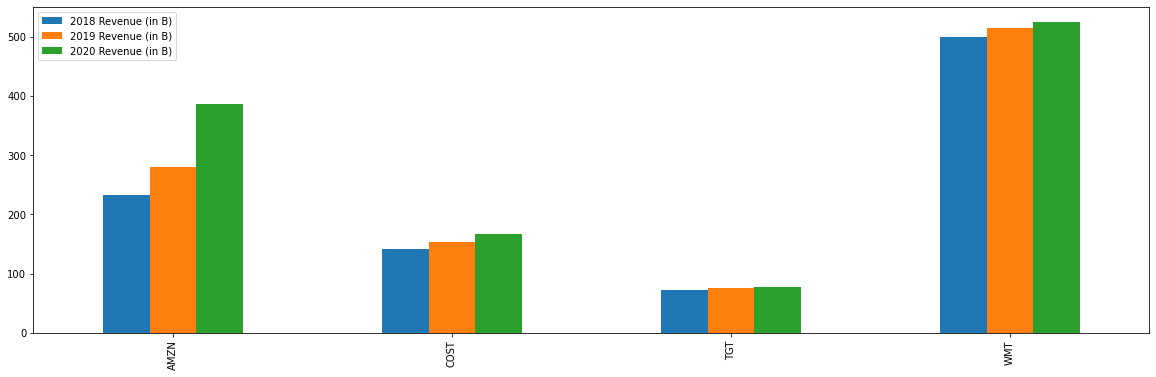

In [50]:
retail_revenue_df.plot(kind="bar",figsize=(20,6), rot=90)

<AxesSubplot:>

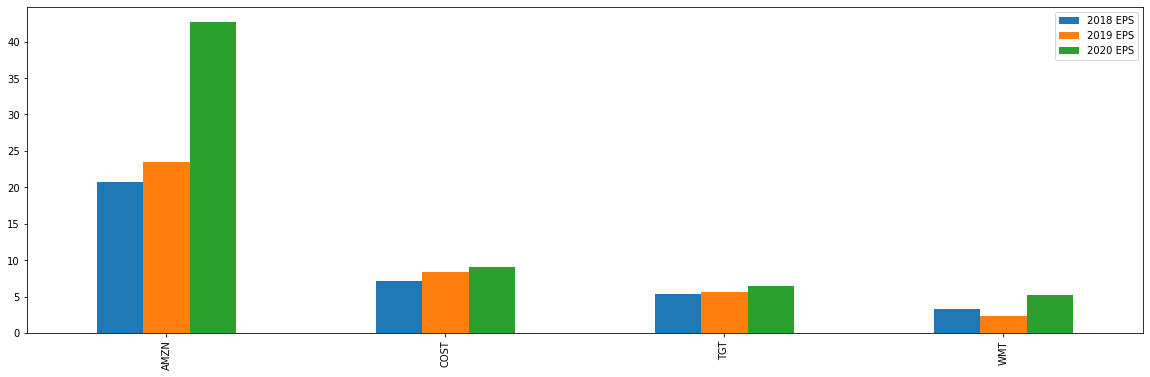

In [45]:
retail_eps_df.plot(kind="bar",figsize=(20,6), rot=90)

<AxesSubplot:>

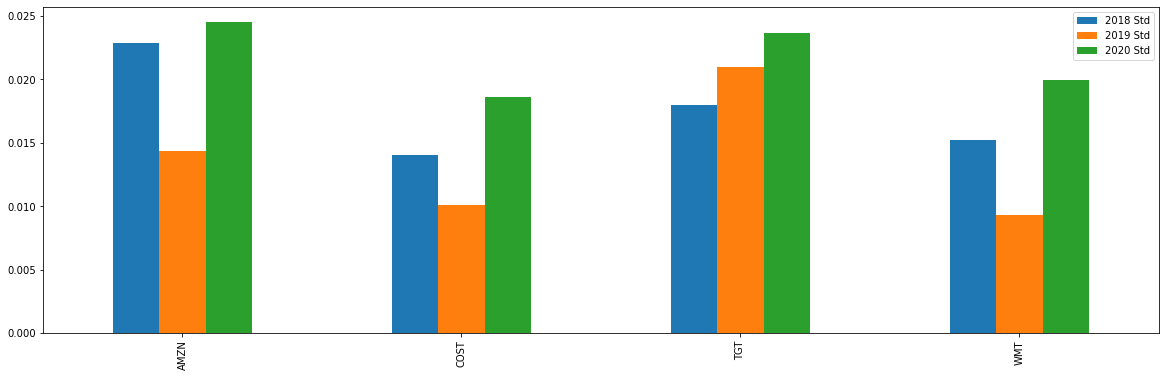

In [46]:
retail_std_df.plot(kind="bar",figsize=(20,6), rot=90)